<a href="https://colab.research.google.com/github/Samuel-538/FML-lab-Work/blob/main/lab_3_17_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
     


In [10]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
X = data.drop('households', axis=1).values
y = data['households'].values
print(y)


[472. 463. 117. ... 456. 478. 270.]


In [19]:
X_rooms = X[:, 5]   #created an array with 
X_rooms

array([1015., 1129.,  333., ..., 1244., 1298.,  806.])

In [22]:
type(X_rooms),type(y)

(numpy.ndarray, numpy.ndarray)

In [24]:
X_rooms.shape,y.shape  #returns the total records present in the dataset

((17000,), (17000,))

In [38]:
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1, 1)
X_rooms   

array([[1015.],
       [1129.],
       [ 333.],
       ...,
       [1244.],
       [1298.],
       [ 806.]])

In [ ]:
X_rooms.shape, y.shape

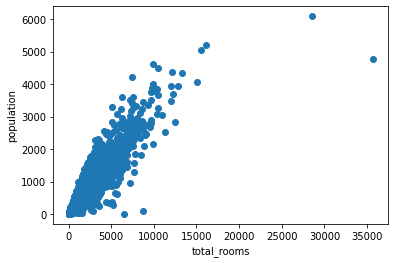

In [35]:
plt.scatter(X_rooms, y)
plt.xlabel('total_rooms')
plt.ylabel('population')
plt.show()

In [39]:
reg = linear_model.LinearRegression() #a linear regression model is formed
reg.fit(X_rooms, y)

LinearRegression()

In [41]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_rooms)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print('R_2 = {r2_score(y, y_pred)}')
     

MAE = 95.41855093095675
MSE = 25617.660681735084
RMSE = 160.05518011528113
R_2 = {r2_score(y, y_pred)}


In [42]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

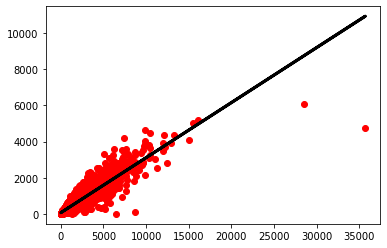

In [43]:
plt.scatter(X_rooms, y, color='red')
plt.plot(X_rooms, reg.predict(X_rooms), color='black', linewidth=3)
plt.show()

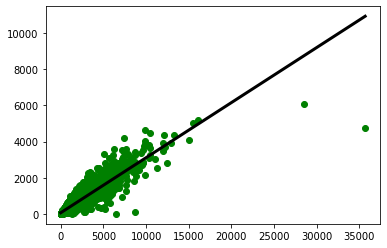

In [44]:
plt.scatter(X_rooms, y, color='green')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()